---

#  **Do Chess Openings Matter?**

An exploratory data analysis by Jaxon Ko. This Jupyter Notebook showcases my Final Project for CMSC320: Data Science at the University of Maryland

---

##  **Introduction**



### *Motivation*

In a game of chess, an **opening** refers to the first moves of the game. According to the [Oxford Companion to Chess](https://en.wikipedia.org/wiki/Chess_opening#:~:text=Many%20opening%20sequences%20have%20standard,varying%20degrees%20of%20common%20usage.), there are 1,327 different openings and variants. To gain an edge over their opponents from the get go, chess masters study a variety of openings and common positions that can be reached from said openings. Even though chess openings make up a small fraction of most  chess games, why do chess masters focus more on understanding openings rather than middlegame tactics or endgames? Does a deeper understanding of chess openings correlate to a higher win rate?

The goal of this project is to see if there is a relationship between the opening moves and the outcome of the game.

### *Understanding the Game*

For those who that don't know, chess is a game played on a board of 64 squares. One player controls the white pieces and the other player controls the black pieces. The player controlling the white pieces is often referred to as "white", and the other player is referred to as "black." Each player starts with 8 pawns, 2 rooks, 2 knights, 2 bishops, a queen, and a king. The starting position of every chess game is as follows:

<img src= "https://i.redd.it/s2wqrlmz5mg61.jpg" width = "500" height = "500">

Each row of the board, called a **rank**, is denoted with a number 1 through 8. The first rank starts on bottom of the board with the white pieces. Each column of the board, called a **file**, is denoted with a letter "a" to "h" from left to right. Ranks and files are used together to describe piece movements throughout the game. 

Each chess piece is able to move differently. See this image for each pieces available moves and captures:

<img src = "https://elzr.com/blag/img/2018/chess-pieces/chess-moves.png" width = "1200" height = "800">

Note that the pawns are only able to move forward twice from their starting position. Pawns can only move forward and capture diagonally. The X labeled on the pawn moves are the available capture squares. All the other pieces (rook, knight, bishop, queen, and king) are able to capture pieces residing on their available moves. The knight is unique in that it is the only piece that is able to jump over other pieces. No other piece is able to move beyond other pieces in their respective directions. For more information on how each piece moves and captures enemy pieces, see this [interactive study on lichess.org](https://lichess.org/study/WvNqVRMX/nIPPeTem)

The goal of the game is to trap the enemy king. Each player takes turns moving one piece on the board. No player is allowed to skip their turn. Whenever a piece attacks the opposing king, the opponent is in **check** and must protect their king by blocking the attack or moving their king out of danger. Note that players cannot put themselves in check. The game ends when a player is in check and cannot prevent their king's capture on the next turn. This is known as **checkmate**. An example board where white wins by checkmate is given below:

<img src = "https://mathtuition88.files.wordpress.com/2018/11/checkmate.png" width = "500" height = "500">

### *Glossary*

- **white**: the player controlling the white pieces
- **black**: the player controlling the black pieces
- **rank**: rows of a chess baord (denoted 1-8)
- **file**: columns of a chess board (denoted a-h)
- **check**: when a player's king is attacked by enemy pieces
- **checkmate**: when a player's king cannot escape check (resulting in a lose)

---

##  **Data Collection**

The data used in this study is from the [Opening Master](https://www.openingmaster.com/chess-databases/om-otb) chess database. The database provides a free list of the top 52 chess openings played at the master level (+2400 ELO) up until January 2022. 

Before we begin to collect the data to this notebook, we will import any libraries we need throughout the notebook. A brief description of each import is given below:

- `chess.pgn`: used to read .pgn (Portable Game Notation) files
- `pandas`: flexible open source data analysis and manipulation tool
- `os`: used to list out files in a directory/folder
- `pickle`: used to save and load our dataset
- `matplotlib.pyplot`: used for showcasing any graphs/visuals
- `chi2_contingency`: used to compute the test statistic of two dependent/independent variables
- `chi2`: used to compute the critical value of a chi-squared test

In [174]:
import chess.pgn

import pandas as pd
import os

import pickle as pkl

import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency, chi2

The folder downloaded from the [Opening Master](https://www.openingmaster.com/chess-databases/om-otb) chess database, named `"OM TOP OPENING"` contains a bunch of folders corresponding to chess openings. Inside these folders are .pgn files with the chess games that follow a specific opening. 

Let's store a list of all the .pgn file paths by walking through each file in each folder of `"OM TOP OPENINGS"`.

In [36]:
#   resulting list of pgn file paths
all_pgns = []

#   walk through OM TOP OPENINGS folder
for opening in os.listdir("OM TOP OPENINGS") :
    #   root path
    path = "OM TOP OPENINGS/" + opening + "/"

    for file in os.listdir(path) :
        #   check for .pgn
        if (".pgn" in file) :
            #   store complete .pgn file path
            all_pgns.append(os.path.join(path, file))

Now that we've collected all the .pgn paths, we can analyze each game. Each `game` returned by the function `chess.pgn.read_game(pgn)` contains an `OrderedDict` called `game.headers`. All of these dictionaries are appended to a 2D list called `dictionary_list`, which is then converted to a `pd.DataFrame`.

**Please note that this code block does not need to be run again.** The resulting DataFrame has been stored as a .pkl file, which will be loaded in the following code blocks. This process is much faster than reruning thne code described above. 

In [173]:
#   read all the games and store them in a 2D list
dictionary_list = []

#   read all the files
for pgn in all_pgns :
    #   tracking reading progress
    print("Reading \"" + str(pgn) + "\"")
    
    #   open this pgn
    pgn = open(pgn, encoding = "latin-1")

    #   iterrate through all the games in this .pgn
    game = chess.pgn.read_game(pgn)
    while game is not None :
        #   append headers (OrderedDict containing data) to list
        dictionary_list.append(game.headers)
        
        #   fetch the game
        game = chess.pgn.read_game(pgn)

#   store the data in a DataFrame
data = pd.DataFrame.from_dict(dictionary_list)

#   save the data to a pkl file
data.to_pickle("data.pkl")

Reading "OM TOP OPENINGS/Accelarated Dragadorf/AcceleratedDragadorf.pgn"
Reading "OM TOP OPENINGS/Alekhine Defence/AlechDefB03.pgn"
Reading "OM TOP OPENINGS/Alekhine Defence Modern/AlechDefModern.pgn"
Reading "OM TOP OPENINGS/Anglo-Dutch/AngloDutch.pgn"
Reading "OM TOP OPENINGS/Anglo-Slav/AngloSlav.pgn"
Reading "OM TOP OPENINGS/Anti Dutch Hopton Attack/HoptonAttackA80.pgn"
Reading "OM TOP OPENINGS/Anti-Grunfeld/AntiGrunfeldD70.pgn"
Reading "OM TOP OPENINGS/Benoni Argentina/BenoniA75.pgn"
Reading "OM TOP OPENINGS/Blumenfeld/BlumenfeldGambit.pgn"
Reading "OM TOP OPENINGS/Budapest Defence/BudapestGambit.pgn"
Reading "OM TOP OPENINGS/Caro Kann Panov/CaroKann.pgn"
Reading "OM TOP OPENINGS/Chebanenko/Chebanenko_Slav.pgn"
Reading "OM TOP OPENINGS/Chigorin/QGChigorin.pgn"
Reading "OM TOP OPENINGS/Dutch Leningrad/DutchLeningradA87.pgn"
Reading "OM TOP OPENINGS/English Reversed/English-Reversed Sicilan PGN.pgn"
Reading "OM TOP OPENINGS/English-Symmetrical/EngSymm.pgn"
Reading "OM TOP OPENINGS/Fr

Now that we've colelcted our data and stored it locally, the data collection process has been completed!

---

##  **Data Management/Representation**

Let's have a look at our original DataFrame that we saved locally:

In [73]:
#   showcase the original data
opening_master_df = pd.read_pickle("data.pkl")
opening_master_df.head()

,Annotator,Black,BlackElo,BlackTeam,BlackTeamCountry,Date,ECO,Event,EventCategory,EventCountry,...,PlyCount,Result,Round,Site,Source,SourceDate,White,WhiteElo,WhiteTeam,WhiteTeamCountry
0,NaN,"Ginsburg, G.",2537,NaN,NaN,2009.09.06,B70,?,NaN,GER,...,113,1-0,6,Nuernberg GER,Opening Master,2009.10.24,"Boguslavskyy, O.",2442,NaN,NaN
1,NaN,"Zhou, Y.",2265,A.D. AJEDREZ MÓSTOLES,NaN,2009.08.25,B72,?,4,FRA,...,91,1-0,4,Dieppe FRA,Opening Master,2009.10.24,"Tirard, H.",2434,A.D. AJEDREZ MÓSTOLES,NaN
2,NaN,"Kudrin, Sergey",2578,NaN,NaN,2009.07.26,B72,?,NaN,BRA,...,53,1/2-1/2,2.10,Sao Paulo BRA,Opening Master,2009.10.24,"Viana Da Costa, Fernando",2284,NaN,NaN
3,NaN,"Kudrin, Sergey",2578,NaN,NaN,2009.07.27,B72,?,NaN,BRA,...,79,1/2-1/2,4.14,Sao Paulo BRA,Opening Master,2009.10.24,"Uribe, Mauricio",2413,NaN,NaN
4,NaN,"Kudrin, S.",2578,NaN,NaN,2009.08.02,B72,?,NaN,BRA,...,50,1-0,10,Sao Paulo BRA,Opening Master,2009.10.24,"Barrientos, S.",2474,NaN,NaN


It goes wihtout saying that there were a lot of details about each game within each .pgn file. Since most of the data is either incomplete or isn't necessary from here on out, we will tidy our master DataFrame. The following changes will be made to the original DataFrame:

- Seperate `"Result"` column into `"WhiteWins"` and `"BlackWins"` columns
    - "1-0" indicates white won
    - "1/2-1/2" indicates a draw
    - "0-1" indicates black won
- Keep the following columns
    - `"ECO"`
    - `"White"`
    - `"Black"`
    - `"WhiteElo"`
    - `"BlackElo"`
    - `"WhiteWins"`
    - `"BlackWins"`
- Sort each row by the Opening Codes (ECO)

In [83]:
#   get the original data from the .pkl file
opening_master_df = pd.read_pickle("data.pkl")

#   seperate result column into WhiteWin and BlackWin
white_wins = []
black_wins = []

for result in opening_master_df["Result"] :
    if result == "1-0" :    #   white won
        white_wins.append(1.0)
        black_wins.append(0.0)
    elif result == "0-1" :  #   black won
        white_wins.append(0.0)
        black_wins.append(1.0)
    else :  #   result == "1/2-1/2", draw
        white_wins.append(0.5)
        black_wins.append(0.5)

opening_master_df["WhiteWins"] = white_wins
opening_master_df["BlackWins"] = black_wins

#   get subset of columns needed for exploratory data analysis
opening_master_df = opening_master_df[["ECO", "White", "Black", "WhiteElo", "BlackElo", "WhiteWins", "BlackWins"]]

#   sort the rows by opening code (ECO)
opening_master_df.sort_values("ECO", ignore_index = True, inplace = True)

#   showcase condensed df
opening_master_df.head()

,ECO,White,Black,WhiteElo,BlackElo,WhiteWins,BlackWins
0,A07,"Horvath, Imre","Fodre, Sandor",2284,2207,0.5,0.5
1,A07,"Todorcevic Miodrag, Beograd JIK","Cebalo, Miso",2530,2485,0.5,0.5
2,A07,"Eisterer, Heinrich","Kwatschewsky, Leo",2300,2355,1.0,0.0
3,A07,"Rosen, Bernd","Westerinen, Heikki M J",2305,2400,0.0,1.0
4,A07,"Dumont, Sadi Glasser","Van Riemsdijk, Herman C",2250,2350,0.0,1.0


Much neater! Now that our dataset has been condensed, we can move on to the exploratory data analysis.

---

##  **Exploratory Data Analysis**

For starters, let's analyze the number of wins and draws from all the games played.

In [98]:
#   results from white perspective (1 = win, 0.5 = draw, 0 = loss)
white_results = opening_master_df["WhiteWins"].value_counts()

print("White Wins: {}".format(white_results[1]))
print("Draws: {}".format(white_results[0.5]))
print("Black Wins: {}\n".format(white_results[0]))
print("White Win Percentage: {0:.2f}%".format(white_results[1] / len(opening_master_df) * 100))
print("Draw Percentage: {0:.2f}%".format(white_results[0.5] / len(opening_master_df) * 100))
print("Black Win Percentage: {0:.2f}%".format(white_results[0] / len(opening_master_df) * 100))

White Wins: 65480
Draws: 71097
Black Wins: 44459

White Win Percentage: 36.17%
Draw Percentage: 39.27%
Black Win Percentage: 24.56%


We can see that a majority of the games are drawn. Intuitively speaking, this makes sense because, most of the time, both players at the master level are fairly matched, which results in fair play and an eventual draw. Between white and black, we can also see that white enjoys first mover advantage with a win rate of 36.17% over black's win rate of 24.56%.

Moving from individual statistics, let's plot the most frequently played openings at the master level. To begin, create a new DataFrame grouped by the opening code. The value of each index is the number of times the opening was played in the original dataset.

In [128]:
#   create a new df counting the number fo times an opening was played
opening_freq = opening_master_df.groupby("ECO")["ECO"].count()

#   sort the frequencies
opening_freq.sort_values(ascending = False, inplace = True)

#   showcase the top opening frequencies
opening_freq.head()

ECO
B33    13869
B09    12501
C11     9796
D15     8044
C42     6756
Name: ECO, dtype: int64

Let's showcase a list of the frequencies as a bar graph

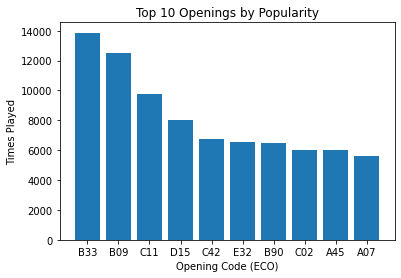

In [129]:
#   plot the top ten openings and their frequency played
plt.bar(opening_freq.index[:10], opening_freq.values[:10])
plt.title("Top 10 Openings by Popularity")
plt.ylabel("Times Played")
plt.xlabel("Opening Code (ECO)")
plt.show()

According to the plot, we can see that the opening B33 was played the most (approixmately 14,000 times). According to the [Encyclopedia of Chess Openings](https://www.chessgames.com/chessecohelp.html), the B33 code corresponds to the Sicilian Defense. The runner-ups are B09 (Pirc, Austrian Attack) and C11 (French Defense).

But does popularity always mean winning? To answer this question, we must compute the win percentage of each opening. **Please note that all the openings are assumed to be played by White, and thus the winning percentage is computed as the number of times white won using an opening divided by the number of games the opening was played in the dataset.**

Since there are some openings that have a few games on record with 100% win rates, we will set a threshold to excluded these biases. More specifically, an opening must have at least 20 games recorded to be considered.

In [136]:
opening_win_rate = opening_master_df.groupby("ECO").sum()

#   drop rows with less than 20 games
for index, row in opening_win_rate.iterrows() :
    if (row["WhiteWins"] + row["BlackWins"] < 20) :
        opening_win_rate.drop(index, inplace = True)

opening_win_rate["WinRate"] = [(row["WhiteWins"] / (row["WhiteWins"] + row["BlackWins"])) for index, row in opening_win_rate.iterrows()]

opening_win_rate.sort_values("WinRate", ascending = False, inplace = True)

opening_win_rate.head()

,WhiteWins,BlackWins,WinRate
ECO,,,
B76,68.0,18.0,0.790698
B75,117.0,49.0,0.704819
D70,682.0,408.0,0.625688
E61,17.5,10.5,0.625000
A83,21.0,13.0,0.617647


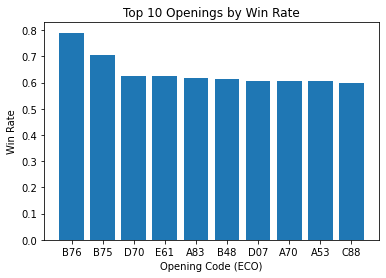

In [133]:
#   plot the top ten openings and their frequency played
plt.bar(opening_win_rate.index[:10], opening_win_rate["WinRate"].values[:10])
plt.title("Top 10 Openings by Win Rate")
plt.ylabel("Win Rate")
plt.xlabel("Opening Code (ECO)")
plt.show()

According to the [Encyclopedia of Chess Openings](https://www.chessgames.com/chessecohelp.html), we can see that B76 (Sicilian, Dragon, Yugoslav Attack), B75 (Sicilian, Dragon, Yugoslav Attack), and D70 (Neo-Grunfeld Defense) are some of the openings as white with the highest win-rates.

---

##  **Hypothesis Testing**

To answer our original question of whether or not playing a certain chess opening has an effect on the outcome of the game, let's create a hypothesis test. The null and alternative hypotheses are given as follows:

- Null Hypothesis: **There is no correlation** between the type of opening played and the outcome of the game
- Alternative Hypothesis: **There is a correlation** between the type of opening played and the outcome of the game

Since we trying to find a correlation between a categorical variable (a chess opening), it's difficult to use a z-test or t-test to prove our hypothesis test. How could we work around this? 

Fortunately enough, I've learned more ways to compute test statistics in my Economic Statistics course (ECON321). To test for independence between variables (including categorical variables), we can use the [Chi-Squared Test of Independence](https://www.ck12.org/book/ck-12-probability-and-statistics-concepts/section/11.6/). For more information on the equations, see the aforementioned hyperlink. Of course, python has packages to make this process and computation simple. Specifically, we use the `chi2_contingency` package to compute the test statistic and p-value of our data, and the `chi2` package to compute the critical value. Before we compute the test statistic, we must create a contingency table. This will include all the chess openings played in the `opening_win_rate` dataset and there total wins and losses.

In [152]:
#   create a contingency table of all the openings and the wins/losses
contingency_table = []

#   sort the opening_win_rate df by ECO codes
opening_win_rate.sort_index(inplace = True)

contingency_table.append(opening_win_rate["WhiteWins"].values.tolist())
contingency_table.append(opening_win_rate["BlackWins"].values.tolist())

print(contingency_table)

[[2982.0, 2413.0, 131.5, 879.0, 316.5, 295.5, 150.0, 214.5, 956.0, 978.0, 3167.5, 1539.0, 375.0, 2877.5, 335.5, 1584.0, 21.0, 14.0, 2881.5, 1788.5, 361.0, 1937.0, 1266.0, 7235.5, 516.5, 14.5, 312.0, 1508.0, 1809.5, 7461.5, 1276.5, 13.0, 10.0, 19.0, 208.0, 1846.5, 816.0, 15.0, 96.5, 117.0, 68.0, 28.5, 1992.0, 12.5, 3617.5, 3216.0, 5514.0, 759.0, 321.0, 1938.0, 3846.5, 2791.0, 2232.5, 2445.0, 1782.5, 14.5, 15.0, 11.0, 21.0, 14.0, 1828.5, 2167.5, 25.0, 12.5, 4503.5, 19.0, 1436.0, 682.0, 871.0, 10.5, 900.0, 3560.5, 17.5, 1242.5, 2016.5], [2643.0, 1951.0, 92.5, 764.0, 254.5, 233.5, 133.0, 193.5, 751.0, 734.0, 2823.5, 1527.0, 245.0, 1861.5, 303.5, 1082.0, 13.0, 12.0, 2106.5, 1401.5, 267.0, 1334.0, 845.0, 5265.5, 401.5, 12.5, 373.0, 1659.0, 1317.5, 6407.5, 914.5, 17.0, 11.0, 12.0, 193.0, 1432.5, 823.0, 15.0, 78.5, 49.0, 18.0, 22.5, 1347.0, 13.5, 2866.5, 2797.0, 4282.0, 790.0, 277.0, 1438.0, 2909.5, 2325.0, 1976.5, 1815.0, 1416.5, 16.5, 14.0, 9.0, 14.0, 11.0, 1492.5, 1398.5, 22.0, 10.5, 3540.5

Now that we have our data for the chi-squared test, let's compute the test statistic and p-value. To compute the critical value, we use a significance level of 0.05 and 74 degrees of freedom. The degrees of freedom is computed by the number of rows and columns from the contingency table. More specifically, `dof = (rows - 1) * (cols - 1)`

In [176]:
#   test statistic & p-value for each opening
test_statistic, p, _, _ = chi2_contingency(contingency_table)

#   degrees of freedom
dof = (len(contingency_table) - 1) * (len(contingency_table[0]) - 1)

#   compute critical value at 0.05 significance level and dof degrees of freedom
critical_value = chi2.ppf(0.05, dof)

#   reject null?
print("Test Statistic = {0:.2f} >= {1:.2f}".format(test_statistic, critical_value))
print("p-value = {} <= 0.05".format(p))

Test Statistic = 599.26 >= 55.19
p-value = 3.273151881260795e-83 <= 0.05


Since the test statistic is greater than the critical value and the p-value is lower than the significance level, we can reject the null hypothesis.

---

##  **Conclusion**

Using the Chi-Square test for interdependence, the results show that there is a significant relationship between the type of chess opening played and the outcome of the game! This answers our original questions of whether or not chess openings actually matter.

It's worth mentioning again that all the openings were assumed to be played by white. To further refine the results of this project, openings by black should be labeled and considered when conducting a hypothesis test. 

---

##  **References**
- [Has the number of draws in chess incrased?](https://en.chessbase.com/post/has-the-number-of-draws-in-chess-increased#:~:text=As%20can%20be%20seen%2C%20the,play%20and%20an%20eventual%20draw.)
- [First-move advantage in chess](https://en.wikipedia.org/wiki/First-move_advantage_in_chess)
- [Chess Openings](https://en.wikipedia.org/wiki/Chess_opening#:~:text=Many%20opening%20sequences%20have%20standard,varying%20degrees%20of%20common%20usage.)
- [Chi-Squared Test](https://www.ck12.org/book/ck-12-probability-and-statistics-concepts/section/11.6/)
- [Encyclopedia of Chess Openings](https://www.chessgames.com/chessecohelp.html)